# Wavelet
A wavelet is a wave-like oscillation with an amplitude that begins at zero, increases, and then decreases back to zero. Generally, wavelets are intentionally crafted to have specific properties that make them useful for signal processing. Wavelets can be combined, with portions of a known signal by convolution to extract information from the unknown signal.

In continuous wavelet transforms, a given signal of finite energy is projected on a continuous family of frequency bands (or similar subspaces of the Lp function space L2(R)). For instance the signal may be represented on every frequency band of the form [f, 2f] for all positive frequencies f > 0. Then, the original signal can be reconstructed by a suitable integration over all the resulting frequency components.

It is computationally impossible to analyze a signal using all wavelet coefficients. Instead one may pick a discrete subset of the upper halfplane to be able to reconstruct a signal from the corresponding wavelet coefficients. That is, a discrete wavelet transform (DWT) is any wavelet transform for which the wavelets are discretely sampled.

Like the fast Fourier transform (FFT), the discrete wavelet transform is a fast, linear operation that operates on a data vector whose length is an integer power of 2, transforming it into a numerically different vector of the same length. The wavelet transform is invertible and in fact orthogonal. Both FFT and DWT can be viewed as a rotation in function space. A key advantage it has over Fourier transforms is temporal resolution: it captures both frequency and location information (location in time).

## Wavelet Filters
The function `wavelet(filter: String)` returns a wavelet filter. The filter name is derived from one of four classes of wavelet transform filters: Daubechies, Least Asymetric, Best Localized and Coiflet. The prefixes for filters of these classes are d, la, bl and c, respectively. Following the prefix, the filter name consists of an integer indicating length. Supported lengths are as follows:

 - Daubechies
 4,6,8,10,12,14,16,18,20.
 - Least Asymetric
 8,10,12,14,16,18,20.
 - Best Localized
 14,18,20.
 - Coiflet
 6,12,18,24,30.

Additionally "haar" is supported for Haar wavelet. Besides, "d4", the simplest and most localized wavelet, uses a different centering method from other Daubechies wavelet.

## Discrete Wavelet Transform
With a wavelet object, we can compute the discrete wavelet transform coefficients for a univariate time series. The size of time series array should be a power of 2. For time series of size no power of 2, 0 padding can be applied.

In [ ]:
import $ivy.`com.github.haifengl::smile-scala:2.2.2`
import $ivy.`org.slf4j:slf4j-simple:1.7.30` 

import smile.wavelet._

In [7]:
val sp500 = Array(
        1103.96, 1107.84, 1114.11, 1108.61, 1106.36, 1097.86, 1105.31,
        1114.51, 1118.84, 1121.08, 1127.53, 1128.55, 1125.53, 1126.60,
        1116.56, 1132.66, 1135.71, 1136.27, 1140.52, 1145.96, 1143.81,
        1137.31, 1145.68, 1147.72, 1136.03, 1147.95, 1138.68, 1115.49,
        1092.40, 1095.80, 1091.94, 1096.93, 1087.61, 1073.89, 1090.05,
        1100.67, 1097.25, 1064.12, 1065.51, 1060.06, 1069.68, 1067.10,
        1075.95, 1079.13, 1096.14, 1099.03, 1105.49, 1110.00, 1107.49,
        1095.89, 1101.24, 1103.10, 1105.36, 1117.01, 1119.36, 1119.12,
        1125.12, 1138.40, 1137.56, 1140.22, 1143.96, 1151.71, 1148.53,
        1150.83, 1159.94, 1166.13, 1166.68, 1157.25, 1166.47, 1172.70,
        1170.03, 1167.58, 1167.71, 1173.75, 1171.75, 1171.23, 1178.71,
        1186.01, 1188.23, 1181.75, 1187.47, 1194.94, 1195.94, 1198.69,
        1210.77, 1210.17, 1192.06, 1199.04, 1207.16, 1202.52, 1207.87,
        1217.07, 1209.92, 1184.59, 1193.30, 1206.77, 1188.58, 1197.50,
        1169.24, 1164.38, 1127.04, 1122.27, 1156.39, 1155.43, 1170.04,
        1157.19, 1136.52, 1138.78, 1119.57, 1107.34, 1067.26, 1084.78,
        1067.42, 1075.51, 1074.27, 1102.59, 1087.30, 1073.01, 1098.82,
        1098.43, 1065.84, 1050.81, 1062.75, 1058.77, 1082.65, 1095.00,
        1091.21, 1114.02, 1115.98, 1116.16, 1122.79, 1113.90, 1095.57,
        1090.93, 1075.10, 1077.50, 1071.10, 1040.56, 1031.10, 1027.65,
        1028.09, 1028.54, 1062.92, 1070.50, 1077.23, 1080.65, 1095.61,
        1094.46, 1093.85, 1066.85, 1064.53, 1086.67, 1072.14, 1092.17,
        1102.89, 1117.36, 1112.84, 1108.07, 1098.44, 1107.53, 1125.34,
        1121.06, 1125.78, 1122.07, 1122.80, 1122.92, 1116.89, 1081.48,
        1082.22, 1077.49, 1081.16, 1092.08, 1092.44, 1075.63, 1073.36,
        1063.20, 1048.98, 1056.28, 1049.27, 1062.90, 1046.88, 1049.72,
        1080.66, 1093.61, 1102.60, 1092.36, 1101.15, 1104.57, 1113.38,
        1121.16, 1119.43, 1123.89, 1126.39, 1126.57, 1142.82, 1139.49,
        1131.10, 1131.69, 1148.64, 1142.31, 1146.75, 1145.97, 1143.49,
        1144.96, 1140.68, 1159.81, 1161.57, 1158.36, 1165.32, 1164.28,
        1171.32, 1177.82, 1177.47, 1176.83, 1178.64, 1166.74, 1179.82,
        1180.52, 1184.74, 1184.88, 1183.84, 1184.47, 1183.87, 1185.71,
        1187.86, 1193.79, 1198.34, 1221.20, 1223.24, 1223.59, 1213.14,
        1213.04, 1209.07, 1200.44, 1194.79, 1178.33, 1183.75, 1196.12,
        1198.07, 1192.51, 1183.70, 1194.16, 1189.08, 1182.96, 1186.60,
        1206.81, 1219.93, 1223.87, 1227.25, 1225.02, 1230.14, 1233.85,
        1242.52, 1241.84, 1241.58, 1236.34
    )

val haar = wavelet("haar")

haar.transform(sp500)

sp500: Array[Double] = Array(
  18136.739999999983,
  -39.78999999999866,
  -201.01454798876014,
  -552.1938275641974,
  69.69124999999973,
  300.4362499999994,
  -37.88500000000036,
  -194.50749999999945,
  -33.99239073859046,
  -117.24183985463571,
  -83.50223979031949,
  170.39682436338123,
  -53.54566100535156,
  36.96047145262114,
  -98.22950627548254,
  -42.13826085785915,
  -34.6975000000003,
  54.44000000000037,
  -15.840000000000153,
  -66.94000000000023,
  -23.08999999999977,
  -10.029999999999673,
  74.8374999999998,
  14.074999999999738,
  111.86749999999952,
  -37.897500000000136,
  75.19000000000001,
  -97.55999999999989,
  -28.14499999999944,
  -22.3575000000001,
  30.279999999999877,
  -72.85749999999994,
  3.705239533417676,
  -1.891510639674143,
  -5.678067452928118,
  56.95038015676451,
  23.079965337929142,
  -42.0021428024813,
...
haar: Wavelet = smile.wavelet.HaarWavelet@3b21c3d2

The above example transform a S&P 500 time series with Haar wavelet. The result is stored in the input array. To transform it back, the method inverse can be applied.

In [8]:
haar.inverse(sp500)

## Wavelet Shrinkage
The wavelet shrinkage is a signal denoising technique based on the idea of thresholding the wavelet coefficients. Wavelet coefficients having small absolute value are considered to encode mostly noise and very fine details of the signal. In contrast, the important information is encoded by the coefficients having large absolute value. Removing the small absolute value coefficients and then reconstructing the signal should produce signal with lesser amount of noise. The wavelet shrinkage approach can be summarized as follows:

- Apply the wavelet transform to the signal.
- Estimate a threshold value.
- The so-called hard thresholding method zeros the coefficients that are smaller than the threshold and leaves the other ones unchanged. In contrast, the soft thresholding scales the remaining coefficients in order to form a continuous distribution of the coefficients centered on zero.
- Reconstruct the signal (apply the inverse wavelet transform).

The biggest challenge in the wavelet shrinkage approach is finding an appropriate threshold value. In this method, we use the universal threshold T = σ sqrt(2*log(N)), where N is the length of time series and σ is the estimate of standard deviation of the noise by the so-called scaled median absolute deviation (MAD) computed from the high-pass wavelet coefficients of the first level of the transform.

The class `WaveletShrinkage` implements this process.

In [9]:
val d4 = wavelet("d4")
val smooth = sp500.clone()
WaveletShrinkage.denoise(smooth, d4)

d4: Wavelet = smile.wavelet.D4Wavelet@72b5d9c8
smooth: Array[Double] = Array(
  1107.1369474907626,
  1108.4943862261746,
  1110.0328166905674,
  1111.5227505673429,
  1110.0005111820408,
  1109.285381189775,
  1109.3773605905455,
  1109.253075681249,
  1114.6023110940203,
  1118.4849211567384,
  1120.9009058694028,
  1123.7098716602131,
  1125.0522121009697,
  1126.7875336198726,
  1128.9158362169208,
  1130.9388398514393,
  1133.5584496059494,
  1136.0181992324083,
  1138.318088730816,
  1140.6608126214373,
  1142.8436763840066,
  1145.0693745387896,
  1147.337907085786,
  1149.5949621919804,
  1139.0335124598273,
  1131.906770747284,
  1128.2147370543503,
  1123.6023761213257,
  1112.772971162039,
  1103.6094181288981,
  1096.1117170219027,
  1088.1676522365867,
  1080.0206891079074,
  1071.928092426478,
  1086.5736846564266,
  1095.1265975302256,
  1080.5956576191925,
  1072.250017420054,
...


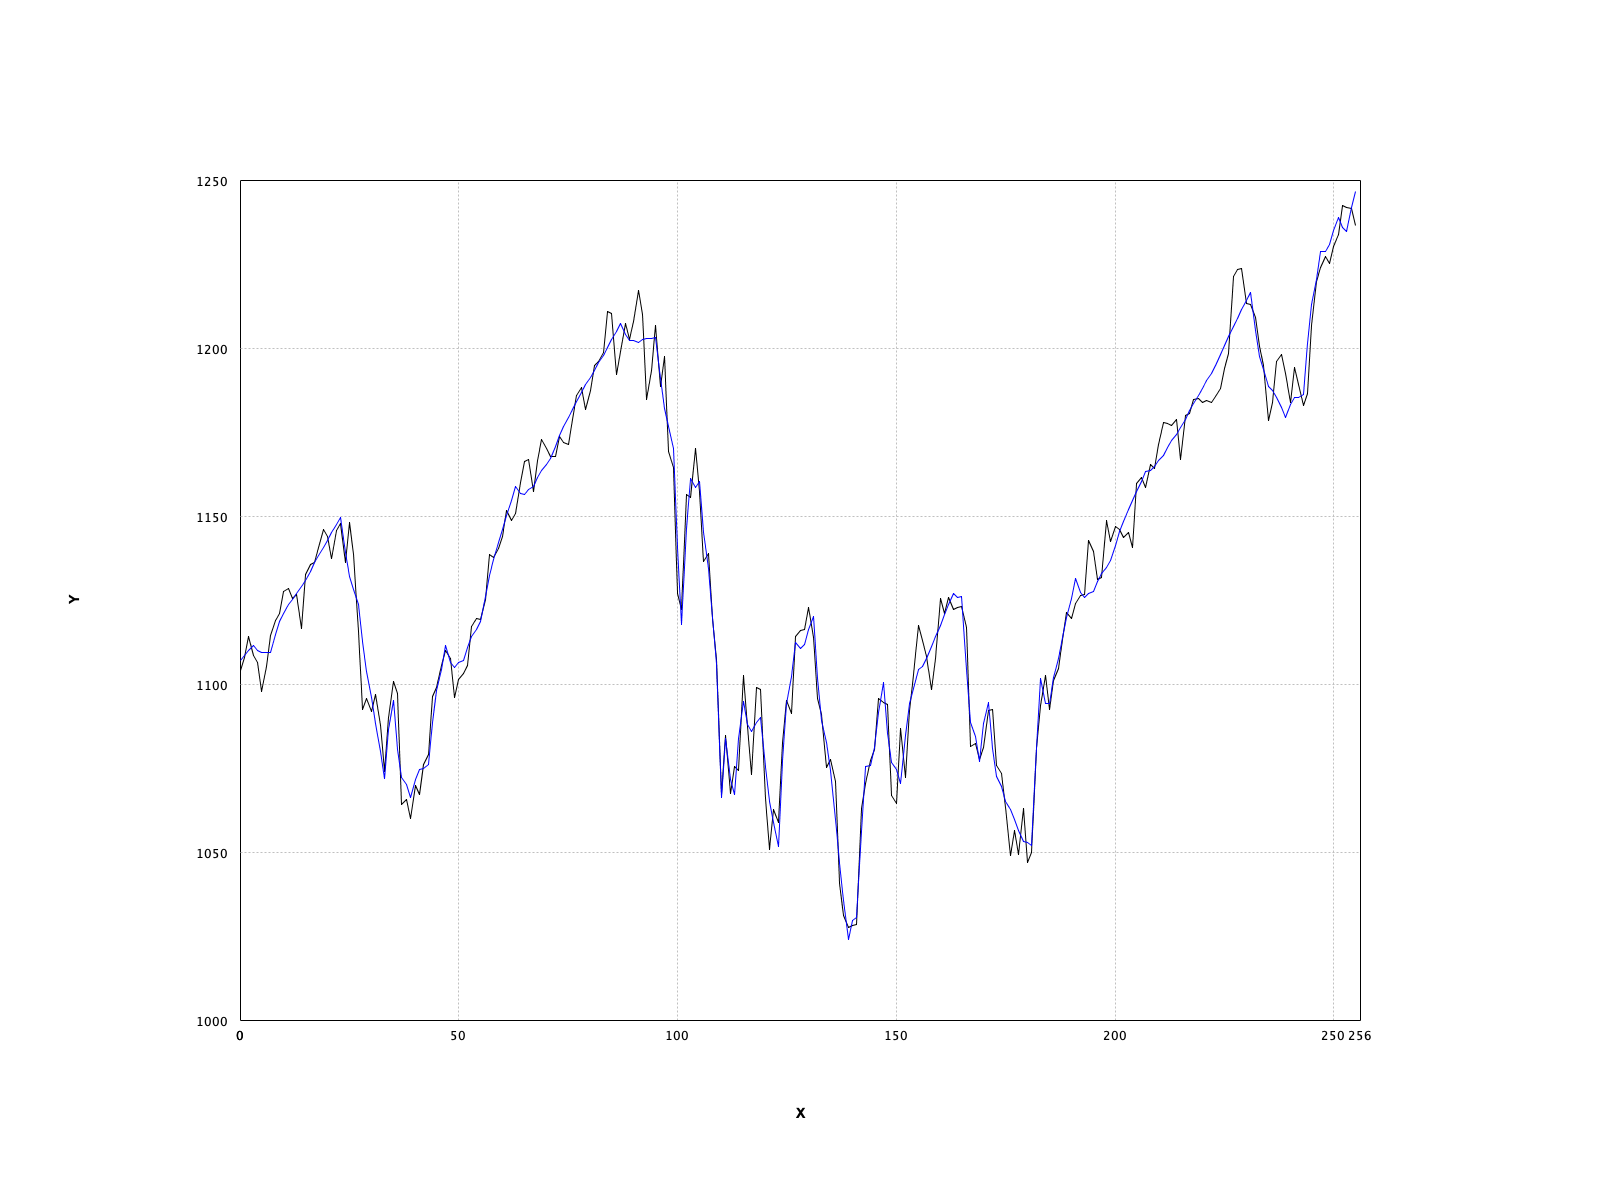

import smile.plot.swing._

import smile.plot.show


res9_2: String = "true"
defined function render
canvas: PlotCanvas = smile.plot.swing.PlotCanvas[,0,0,1600x1200,layout=java.awt.BorderLayout,alignmentX=0.0,alignmentY=0.0,border=javax.swing.border.EmptyBorder@50077737,flags=9,maximumSize=,minimumSize=,preferredSize=java.awt.Dimension[width=1600,height=1200]]
res9_5: LinePlot = smile.plot.swing.LinePlot@6d693084

In [10]:
import smile.plot.swing._
import smile.plot.show

System.setProperty("java.awt.headless", "true")
implicit def render(canvas: javax.swing.JComponent): Unit = {
  publish.html(smile.plot.swing.img(canvas))
}

val canvas = LinePlot.plot(sp500)
canvas.line(smooth, java.awt.Color.BLUE)
show(canvas)